In [2]:
from google.colab import files
upload = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [3]:
from google.colab import files
upload = files.upload()

Saving mnist_test.csv to mnist_test.csv


In [4]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'mnist_test.csv', 'mnist_train.csv', 'sample_data']


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import pandas as pd

# Load the CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [7]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import numpy as np
def preprocess_data(train_data, test_data):
    # Extract labels (assuming first column is labels)
    train_labels = train_data.iloc[:, 0].values
    test_labels = test_data.iloc[:, 0].values

    # Extract images (rest of the columns)
    train_images = train_data.iloc[:, 1:].values
    test_images = test_data.iloc[:, 1:].values

     # Convert images to float
    train_images = train_images.astype('float32')
    test_images = test_images.astype('float32')

    return train_images, train_labels, test_images, test_labels

In [11]:
# Preprocess data
train_images, train_labels, test_images, test_labels = preprocess_data(train_data, test_data)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

In [13]:
# Define data augmentation (only applies to the training set)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False
)

# Fit the data generator
datagen.fit(x_train)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
# Define model
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Build and compile model
input_shape = (28, 28, 1)  # (height, width, channels)
num_classes = 10  # Number of classes in MNIST
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [16]:
# Training the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
938/938 [==============================] - 81s 85ms/step - loss: 0.5148 - accuracy: 0.8350 - val_loss: 0.0920 - val_accuracy: 0.9699
Epoch 2/20
938/938 [==============================] - 78s 83ms/step - loss: 0.1997 - accuracy: 0.9402 - val_loss: 0.0842 - val_accuracy: 0.9727
Epoch 3/20
938/938 [==============================] - 78s 84ms/step - loss: 0.1507 - accuracy: 0.9556 - val_loss: 0.0640 - val_accuracy: 0.9796
Epoch 4/20
938/938 [==============================] - 78s 83ms/step - loss: 0.1268 - accuracy: 0.9625 - val_loss: 0.0542 - val_accuracy: 0.9837
Epoch 5/20
938/938 [==============================] - 80s 86ms/step - loss: 0.1182 - accuracy: 0.9651 - val_loss: 0.0523 - val_accuracy: 0.9823
Epoch 6/20
938/938 [==============================] - 79s 84ms/step - loss: 0.1057 - accuracy: 0.9690 - val_loss: 0.0472 - val_accuracy: 0.9834
Epoch 7/20
938/938 [==============================] - 78s 83ms/step - loss: 0.0954 - accuracy: 0.9726 - val_loss: 0.0395 - val_accuracy:

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 - 3s - loss: 0.0441 - accuracy: 0.9874 - 3s/epoch - 8ms/step
Test accuracy: 0.9874


In [19]:
from tensorflow.keras.layers import Dropout

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Apply dropout with a rate of 50%
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [20]:
from tensorflow.keras.regularizers import l2

def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

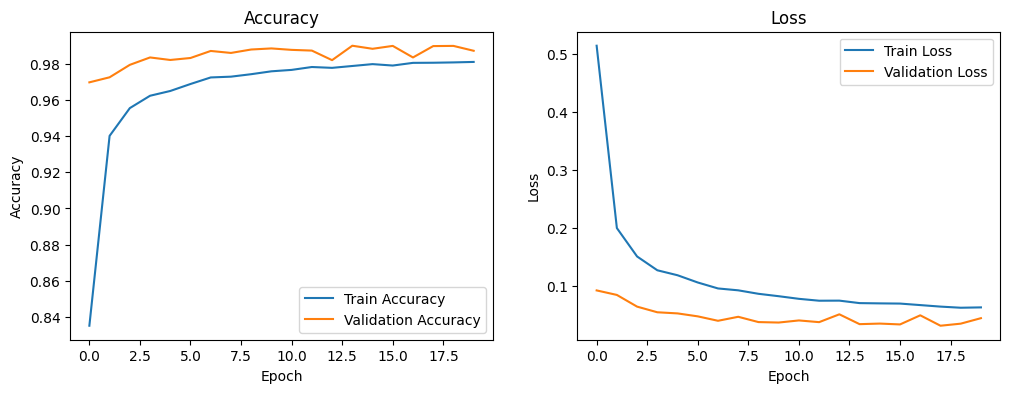

In [21]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [22]:
import matplotlib.pyplot as plt

def plot_sample_images(x_test, y_test, predictions, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(y_test[i])}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

In [23]:
# Make predictions on the test set
predictions = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


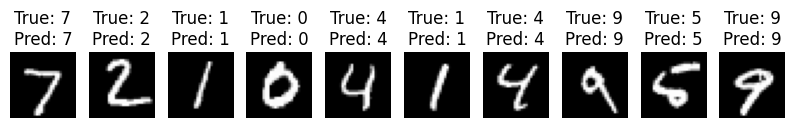

In [24]:
plot_sample_images(x_test, y_test, predictions, num_samples=10)